In [10]:
df= pd.read_csv('IMDB .csv')
print(df)
df.head(10)

                                                  review
0      One of the other reviewers has mentioned that ...
1      A wonderful little production. <br /><br />The...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
4      Petter Mattei's "Love in the Time of Money" is...
...                                                  ...
49995  I thought this movie did a down right good job...
49996  Bad plot, bad dialogue, bad acting, idiotic di...
49997  I am a Catholic taught in parochial elementary...
49998  I'm going to have to disagree with the previou...
49999  No one expects the Star Trek movies to be high...

[50000 rows x 1 columns]


,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...


In [12]:
df.isnull().sum()

review    0
dtype: int64

In [2]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 337.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 3.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 3.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 3.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 4.3 MB/s eta 0:00:01
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file into a DataFrame
df = pd.read_csv("review.csv")

# Select first 50000 rows (assuming the dataset has more than 50000 rows)
df = df.head(50000)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Preprocess the data and create labeled feature sets
labeled_reviews = []
for review, sentiment in df[['review', 'sentiment']].values:
    tokens = word_tokenize(review.lower())
    cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    labeled_reviews.append((cleaned_tokens, sentiment))

# Split the dataset into training and testing sets
train_set, test_set = labeled_reviews[:40000], labeled_reviews[40000:]

# Define a feature extractor function
def extract_features(review):
    return {word: True for word in review}

# Convert the train_set to the required format
train_set = [(extract_features(review), sentiment) for (review, sentiment) in train_set]

# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Evaluate the classifier
print("Classifier Accuracy:", accuracy(classifier, [(extract_features(review), sentiment) for (review, sentiment) in test_set]))

# Determine the percentage of negative and positive reviews
positive_reviews = sum(1 for (review, sentiment) in test_set if classifier.classify(extract_features(review)) == 'positive')
negative_reviews = sum(1 for (review, sentiment) in test_set if classifier.classify(extract_features(review)) == 'negative')
total_reviews = len(test_set)

percentage_positive = (positive_reviews / total_reviews) * 100
percentage_negative = (negative_reviews / total_reviews) * 100

print("Percentage of Positive Reviews:", percentage_positive)
print("Percentage of Negative Reviews:", percentage_negative)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yajne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yajne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classifier Accuracy: 0.8601
Percentage of Positive Reviews: 51.2
Percentage of Negative Reviews: 48.8


In [32]:
# Load the CSV file into a DataFrame
df = pd.read_csv("flipkart_product.csv", encoding='ISO-8859-1')


# Drop the "price" column
df.drop(columns=["Price"], inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv("fp.csv", index=False)


In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.classify.util import apply_features

# Load the CSV file into a DataFrame
df = pd.read_csv("fp.csv")

# Define stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

# Preprocess the data
def preprocess_review(review):
    if isinstance(review, str):
        tokens = word_tokenize(review.lower())
        cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return dict([(word, True) for word in cleaned_tokens])
    else:
        return {}

# Apply the feature extractor function to each review in the DataFrame
df['Features'] = df['Review'].apply(preprocess_review)

# Apply the classifier to each review and obtain the predicted sentiment
df['Predicted Sentiment'] = df['Features'].apply(lambda x: classifier.classify(x))

# Display the DataFrame with predicted sentiment
print(df[['ProductName', 'Review', 'Predicted Sentiment']])


                                              ProductName           Review  \
0       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...           Super!   
1       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...          Awesome   
2       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...             Fair   
3       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  Useless product   
4       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...             Fair   
...                                                   ...              ...   
189869  NIVEA Soft Light Moisturizer for Face, Hand & ...         Terrific   
189870  NIVEA Soft Light Moisturizer for Face, Hand & ...         Terrific   
189871  NIVEA Soft Light Moisturizer for Face, Hand & ...        Just wow!   
189872  NIVEA Soft Light Moisturizer for Face, Hand & ...  Worth the money   
189873                                                                NaN   

       Predicted Sentiment  
0                 negative  
1    

In [35]:
df.to_csv("fp_with_sentiment.csv", index=False)


C:\Users\yajne\AppData\Local\Temp\ipykernel_21928\924876322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Sentiment'] = df_sample['Predicted Sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


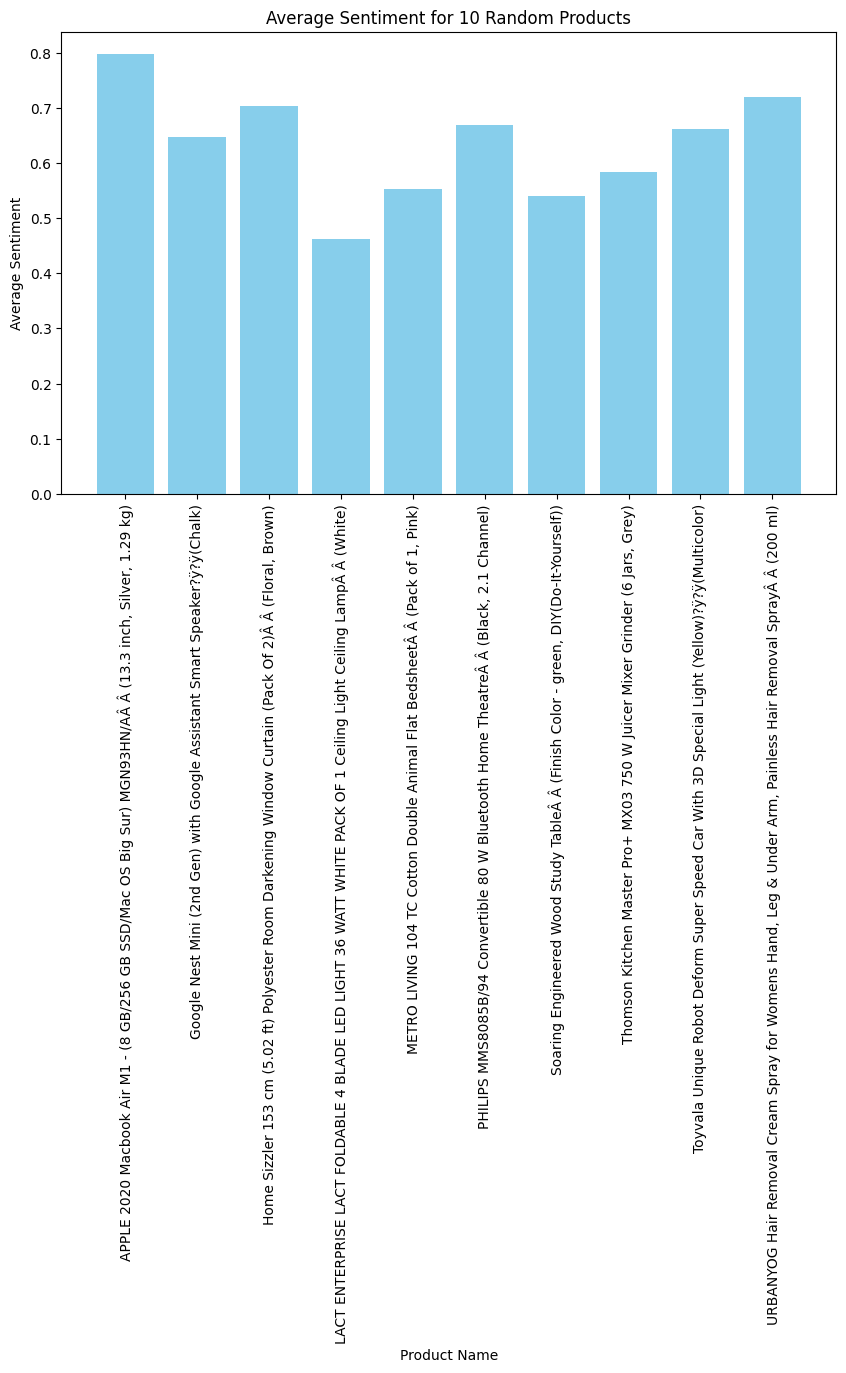

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: ProductName, Predicted Sentiment

# Select a random sample of 10 products
random_products = df['ProductName'].sample(n=10, random_state=42)

# Filter the DataFrame to include only the random products
df_sample = df[df['ProductName'].isin(random_products)]

# Convert sentiment strings to numeric values
df_sample['Sentiment'] = df_sample['Predicted Sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Group the DataFrame by product name and calculate the average sentiment for each product
average_sentiment = df_sample.groupby('ProductName')['Sentiment'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_sentiment['ProductName'], average_sentiment['Sentiment'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment for 10 Random Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [44]:
# Load the CSV file containing product names and sentiment
df = pd.read_csv("fp_with_sentiment.csv")

# Group by both "ProductName" and "Predicted Sentiment" and apply mode function
grouped_df = df.groupby(["ProductName", "Predicted Sentiment"]).size().reset_index(name='count')
idx = grouped_df.groupby(["ProductName"])['count'].transform(max) == grouped_df['count']
grouped_df = grouped_df[idx]

# Reset the index to make the DataFrame more manageable
grouped_df.reset_index(drop=True, inplace=True)

# Save the grouped DataFrame to a new CSV file
grouped_df.to_csv("grouped_product_sentiment.csv", index=False)


C:\Users\yajne\AppData\Local\Temp\ipykernel_21928\340817336.py:8: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = grouped_df.groupby(["ProductName"])['count'].transform(max) == grouped_df['count']


In [48]:
# Load the CSV file containing product names and sentiment
df = pd.read_csv("grouped_product_sentiment.csv")

# Filter product names with positive sentiment
positive_products = df[df['Predicted Sentiment'] == 'positive']['ProductName']

# Filter product names with negative sentiment
negative_products = df[df['Predicted Sentiment'] == 'negative']['ProductName']

# Save positive product names to fp_pos.csv
positive_products.to_csv("fp_pos.csv", index=False)

# Save negative product names to fp_neg.csv
negative_products.to_csv("fp_neg.csv", index=False)


In [49]:
df = pd.read_csv("fp_pos.csv")
print(df)

                                           ProductName
0    1170-BL-BR Unique New Day & Date Analog Watch ...
1        38024PP25 Minimalists Analog Watch  - For Men
2    3D METRO SUPER STORE JUICER_Gduumy 1 Juicer,1 ...
3    3D METRO SUPER STORE METRO_MIXER Pro 0 Juicer ...
4               77085PP03 Volt Analog Watch  - For Men
..                                                 ...
722  the indian casa Cricket Net 10x20 Feet Nylon C...
723  thos 5 Layer Simple Bookshelf/Multipurpose Rac...
724  thos 5 Layer Simple Bookshelf/Multipurpose Rac...
725  vesco Kiddo 14" Cycle for Kids Bicycles age 3 ...
726  wood city handicrafts wooden round side coffee...

[727 rows x 1 columns]


In [50]:
dg = pd.read_csv("fp_neg.csv")
print(dg)

                                           ProductName
0                                                    
1    ADZOY Metal Lazy Stand Bracket for Neck Rest o...
2       AGRO ALIVE Red Sandalwood PlantÂ Â (Pack of 1)
3    Aquagrand SkyLand 18 Ltr RO + UV + UF + TDS Wa...
4    BAJAJ 410053 600 W Food ProcessorÂ Â (Multicolor)
..                                                 ...
96            liger Dust Cleaning Mop Brush Wet Duster
97   migwow Stunt Car 360?ørotating rolling radio c...
98   pb mandira plant Strawberry PlantÂ Â (Hybrid, ...
99   realme 4k Smart Google TV Stick (Black)?ÿ?ÿ(Bl...
100  realme Mobile Game Finger Sleeves  Gaming Acce...

[101 rows x 1 columns]
